<a href="https://colab.research.google.com/github/kushal1432u/1stclass/blob/main/SPAM_CLASSIFICATION__DEC_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📌 **Problem Statement: SMS Spam Detection using Logistic Regression**

### ✅ Business Context:

In the era of digital communication, mobile users frequently receive unsolicited SMS messages commonly known as **spam**. These spam messages are not just annoying but may also pose **security threats** like phishing or fraud.

Telecommunication companies and mobile app providers want to **automatically filter spam messages** to **protect users** and **improve user experience**.

---

### ✅ Objective:

To **develop a classification model** that can **automatically classify incoming SMS messages as either**:

* **"Spam" (Unwanted Message)**
  OR
* **"Ham" (Legitimate Message)**

based on the **text content** of the message.

---

### ✅ Type of Problem:

* **Supervised Machine Learning**
* **Binary Classification**
* **Algorithm Chosen:** Logistic Regression

---

### ✅ Dataset:

* Contains two columns:

  * **Text:** The content of the SMS.
  * **Label:** `spam` or `ham`.

You can use a publicly available dataset like the **"SMS Spam Collection Dataset" (UCI Machine Learning Repository)**.

---

### ✅ Steps Involved:

| Step | Task                                                                                             |
| ---- | ------------------------------------------------------------------------------------------------ |
| 1    | Data Collection                                                                                  |
| 2    | Text Preprocessing (Tokenization, Lowercasing, Removing Stopwords, Lemmatization/Stemming, etc.) |
| 3    | Feature Extraction using **TF-IDF Vectorization**                                                |
| 4    | Splitting Data into Train and Test sets                                                          |
| 5    | Building Logistic Regression Model                                                               |
| 6    | Model Evaluation using **Accuracy**, **Precision**, **Recall**, **F1-Score**, **ROC-AUC**        |
| 7    | Testing model on new SMS inputs                                                                  |

---

### ✅ Expected Outcome:

✅ The model should predict whether a new incoming SMS is likely to be **spam** or **ham**, with a reasonable level of **accuracy and precision**, ensuring **minimum false positives (ham classified as spam)**.

---

### ✅ Business Impact:

* **Increased user trust** in mobile communication.
* **Reduced spam load** on mobile networks.
* **Better user engagement** for SMS-based apps.

---

✅ If you want, I can help with a **full Jupyter Notebook template for this project using TF-IDF and Logistic Regression**. Want me to? 😊



* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATA](#2)
    
* [3. DATA EXPLORATION](#3)
    * [3.1 FEATURE ENGINEERING](#3.1)
    * [3.2 OUTLIER DETECTION](#3.2)
    
    
* [4. DATA PREPREPROCESSING](#4)
    
    * [4.1 CLEANING TEXT](#4.1)
    * [4.2 TOKENIZATION](#4.2)
    * [4.3 REMOVING STOPWORDS](#4.3)
    * [4.4 LEMMATIZATION](#4.4)
    
    
* [5. VECTORIZATION](#5)
      
* [6. MODEL BUILDING](#6)
    
* [7. EVALUATING MODELS](#7)
    
* [8. END](#8)

<p style="background-color:#E1F16B;font-family:newtimeroman;color:#E598D8;font-size:150%;text-align:center;border-radius:20px 60px;">START</p>

In [1]:
#Importing Libraries
import pandas as pd # Data Analysis and Manipulation
import numpy as np  # complex numerical Computation in the form of arrays and matrix
import seaborn as sns # Visualization tool

#NLP TOOLS for Text Preprocessing
import nltk
nltk.download('punkt_tab')

#Ignore warnings in output
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [3]:
# prompt: unzip /content/archive.zip

!unzip /content/archive.zip

Archive:  /content/archive.zip
replace spam.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [4]:
#Loading the Data
df = pd.read_csv('/content/spam.csv',encoding='latin1')
print("Data loaded successfully.")


#EDA --> Exploratory Data Analysis
#Summarize the Data
df.info()


Data loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# prompt: drop 2   Unnamed: 2  50 non-null     object
#  3   Unnamed: 3  12 non-null     object
#  4   Unnamed: 4  6 non-null      object

# Removing unwanted Columns

df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
#Exploring the Data

df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# prompt: rename v1 as target and v2 as text
#Renaming the features

df = df.rename(columns={'v1': 'target', 'v2': 'text'})
pd.set_option('display.max_colwidth', None)
df.head()


,target,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


<a id="3.1"></a>
# <p style="background-color:#E1F16B;font-family:newtimeroman;color:#E598D8;text-align:center;font-size:80%;border-radius:20px 60px;">FEATURE ENGINEERING</p>

For the purpose of data exploration, I am creating new features

* No_of_Characters: Number of characters in the text message
* No_of_Words: Number of words in the text message
* No_of_sentence: Number of sentences in the text message  

In [8]:
#Adding a column of numbers of charachters,words and sentences in each msg
#Descriptive Statistics to Understand the Average Distribution and deviation of Data
import nltk
nltk.download('punkt_tab')
df["No_of_Characters"] = df["text"].apply(len)
df["No_of_Words"]=df.apply(lambda row: nltk.word_tokenize(row["text"]), axis=1).apply(len)
df["No_of_sentence"]=df.apply(lambda row: nltk.sent_tokenize(row["text"]), axis=1).apply(len)

df.describe().T

#PS. At this step, I tokenised the words and sentences and used the length of the same.
#More on Tokenizing later in the notebook.

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,count,mean,std,min,25%,50%,75%,max
No_of_Characters,5572.0,80.118808,59.690841,2.0,36.0,61.0,121.0,910.0
No_of_Words,5572.0,18.699390,13.741932,1.0,9.0,15.0,27.0,220.0
No_of_sentence,5572.0,1.996411,1.520159,1.0,1.0,1.5,2.0,38.0


from matplotlib import pyplot as plt
_df_0['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['25%'].plot(kind='hist', bins=20, title='25%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='25%', y='50%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['25%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('25%')

from matplotlib import pyplot as plt
_df_12['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['25%'].plot(kind='line', figsize=(8, 4), title='25%')
plt.gca().spines[['top', 'right']].set_visible(False)

In [9]:
tail_df = df.tail(int(len(df) * 0.25))
tail_df

,target,text,No_of_Characters,No_of_Words,No_of_sentence
4179,ham,"swhrt how u dey,hope ur ok, tot about u 2day.love n miss.take care.",67,17,1
4180,ham,"Ok da, i already planned. I wil pick you.",41,12,2
4181,spam,"Urgent! Please call 0906346330. Your ABTA complimentary 4* Spanish Holiday or å£10,000 cash await collection SAE T&Cs BOX 47 PO19 2EZ 150ppm 18+",144,28,3
4182,ham,"Sorry, I'll call later in meeting",33,8,1
4183,ham,I just really need shit before tomorrow and I know you won't be awake before like 6,83,18,1
...,...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",161,35,4
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",57,15,2
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,125,27,1


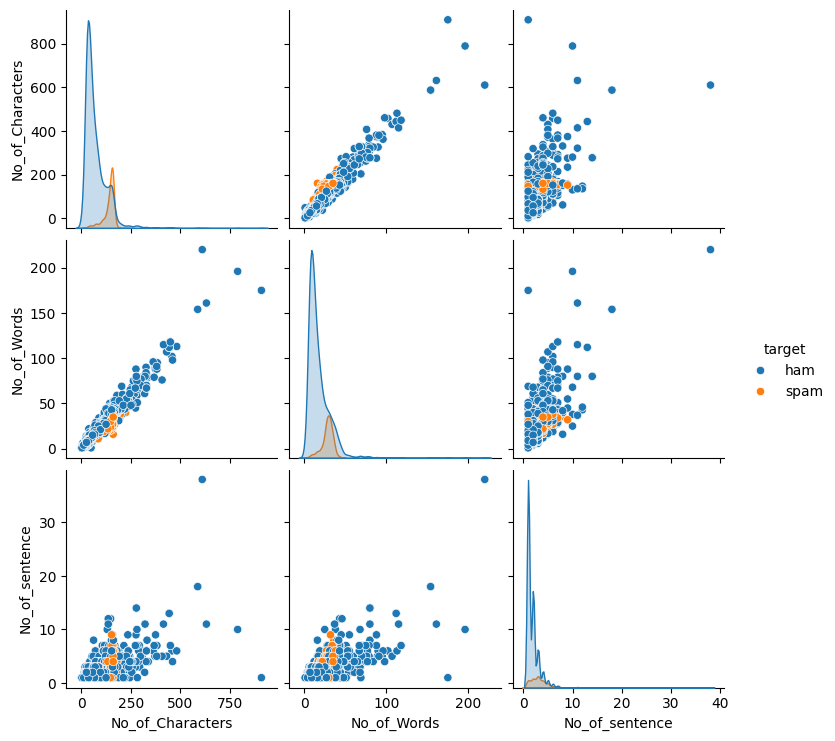

In [10]:
# prompt: pair plot

sns.pairplot(df, hue='target')

In [11]:
# prompt: detect outlier range for characters
#IQR Analysis to detect and Handle the OUtlier

import matplotlib.pyplot as plt

# Outlier detection using the Interquartile Range (IQR) method
Q1 = df[['No_of_Characters', 'No_of_Words', 'No_of_sentence']].quantile(0.25)
Q3 = df[['No_of_Characters', 'No_of_Words', 'No_of_sentence']].quantile(0.75)
IQR = Q3 - Q1

outlier_range_lower = Q1 - 1.5 * IQR
outlier_range_upper = Q3 + 1.5 * IQR

print("Outlier Range (Lower Bound):")
print(outlier_range_lower)
print("\nOutlier Range (Upper Bound):")
print(outlier_range_upper)


Outlier Range (Lower Bound):
No_of_Characters   -91.5
No_of_Words        -18.0
No_of_sentence      -0.5
dtype: float64

Outlier Range (Upper Bound):
No_of_Characters    248.5
No_of_Words          54.0
No_of_sentence        3.5
dtype: float64


In [12]:
# prompt: #Dropping the outliers.
# df= df[(df["No_of_Characters"]<248)]
# df.shape

#Dropping the outliers.
df= df[(df["No_of_Characters"]<248)]
df.shape

(5503, 5)

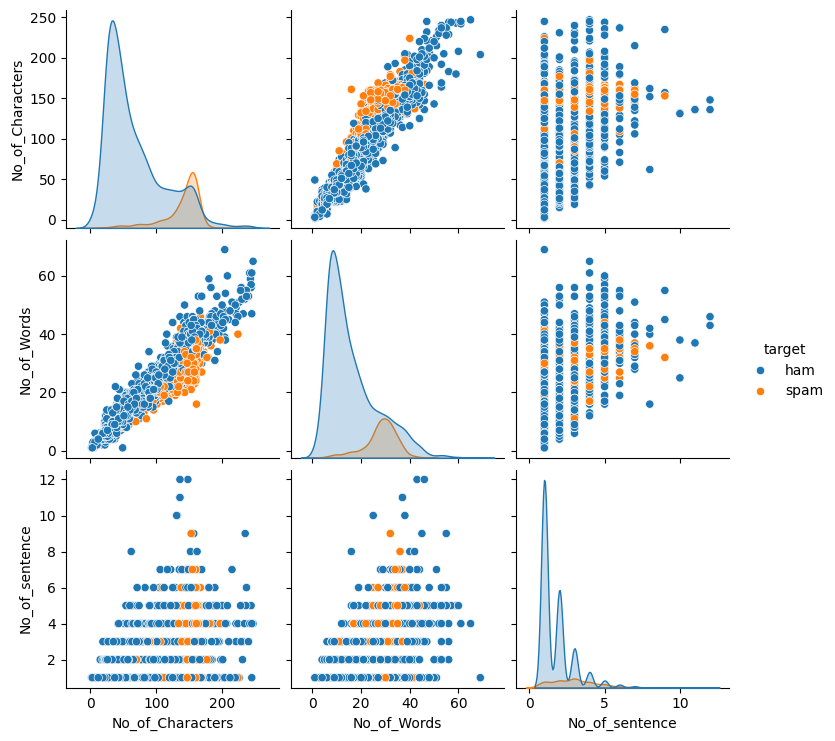

In [13]:
sns.pairplot(df, hue='target')

In [14]:
#Adding a column of numbers of charachters,words and sentences in each msg
import nltk
nltk.download('punkt_tab')
df["No_of_Characters"] = df["text"].apply(len)
df["No_of_Words"]=df.apply(lambda row: nltk.word_tokenize(row["text"]), axis=1).apply(len)
df["No_of_sentence"]=df.apply(lambda row: nltk.sent_tokenize(row["text"]), axis=1).apply(len)

df.describe().T

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,count,mean,std,min,25%,50%,75%,max
No_of_Characters,5503.0,76.647647,49.405531,2.0,35.0,60.0,119.0,247.0
No_of_Words,5503.0,17.844085,10.870409,1.0,9.0,15.0,26.0,69.0
No_of_sentence,5503.0,1.933309,1.292720,1.0,1.0,1.0,2.0,12.0


In [ ]:
df.head()

#Data Preprocessing


#Removing Special Characters and Numbers, Including only Alphabets



In [15]:
# prompt: remove special characters and numbers from text in df
#Cleaning the Text by including only the alphabets and space from the text(sms)
import re
def remove_special_characters_and_numbers(text):
    # Remove special characters and numbers, keep only alphabets and spaces
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    return cleaned_text

df['clean_text'] = df['text'].apply(remove_special_characters_and_numbers)

df.head()

,target,text,No_of_Characters,No_of_Words,No_of_sentence,clean_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2,Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat
1,ham,Ok lar... Joking wif u oni...,29,8,2,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2,Free entry in a wkly comp to win FA Cup final tkts st May Text FA to to receive entry questionstd txt rateTCs apply overs
3,ham,U dun say so early hor... U c already then say...,49,13,1,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,15,1,Nah I dont think he goes to usf he lives around here though


#Tokenization

In [16]:
# prompt: tokenization --> Breaking down in to words

nltk.download('punkt')
df['clean_text'] = df['clean_text'].apply(lambda x: nltk.word_tokenize(x))


# prompt: count number of tokens for each message in clean text and create a new column

df['num_tokens'] = df['clean_text'].apply(len)

df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,target,text,No_of_Characters,No_of_Words,No_of_sentence,clean_text,num_tokens
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2,"[Go, until, jurong, point, crazy, Available, only, in, bugis, n, great, world, la, e, buffet, Cine, there, got, amore, wat]",20
1,ham,Ok lar... Joking wif u oni...,29,8,2,"[Ok, lar, Joking, wif, u, oni]",6
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2,"[Free, entry, in, a, wkly, comp, to, win, FA, Cup, final, tkts, st, May, Text, FA, to, to, receive, entry, questionstd, txt, rateTCs, apply, overs]",25
3,ham,U dun say so early hor... U c already then say...,49,13,1,"[U, dun, say, so, early, hor, U, c, already, then, say]",11
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,15,1,"[Nah, I, dont, think, he, goes, to, usf, he, lives, around, here, though]",13


In [ ]:
#Exploring original and modified data

print("Original text examples:")
for i in range(5):
    print(f"Row {i}: {df['text'][i]}")

print("\nCleaned and lemmatized text examples:")
for i in range(5):
    print(f"Row {i}: {df['clean_text'][i]}")

#Removing Stopwords



**Stopwords** are frequently occurring words(*such as few, is, an, etc*). These words hold meaning in sentence structure, but do not contribute much to language processing in NLP. For the purpose of removing redundancy in our processing, I am removing those. NLTK library has a set of default stopwords that we will be removing.

In [ ]:
# prompt: remove stopwords  --> to eliminate little or no meaning words.

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
  return [word for word in tokens if word.lower() not in stop_words]

df['clean_text'] = df['clean_text'].apply(remove_stopwords)


df['num_tokens'] = df['clean_text'].apply(len)

df.head()

In [ ]:
print("Original text examples:")
for i in range(5):
    print(f"Row {i}: {df['text'][i]}")

print("\nCleaned and lemmatized text examples:")
for i in range(5):
    print(f"Row {i}: {df['clean_text'][i]}")

#Lemmatization

In [ ]:
# prompt: lemmatization --> Identify root word and replace with root word.

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
  return [lemmatizer.lemmatize(word,pos='v') for word in text]

df['clean_text'] = df['clean_text'].apply(lemmatize_words)


df['num_tokens'] = df['clean_text'].apply(len)


df.head()

In [ ]:
# prompt: show some words from clean text and original text to see lemmatization

print("Original text examples:")
for i in range(5):
    print(f"Row {i}: {df['text'][i]}")

print("\nCleaned and lemmatized text examples:")
for i in range(5):
    print(f"Row {i}: {df['clean_text'][i]}")

#Feature Encoding


In [ ]:
# Label Encoder--> Convert categorical into numerical Values.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])
df.head()


In [ ]:
display("\nEncoded target classes:", le.classes_)

'\nEncoded target classes:'

array(['ham', 'spam'], dtype=object)

In [ ]:
df.head()

#Feature Vectors

In [ ]:
# prompt: tfidfvectorizer--> to convert data into Vectors (Machine readable form)

from sklearn.feature_extraction.text import TfidfVectorizer

# Convert list of tokens back to string for TF-IDF Vectorization
df['clean_text_str'] = df['clean_text'].apply(lambda x: ' '.join(x))

tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_text_str'])

print("TF-IDF matrix shape:", tfidf_matrix.shape)

# You can now use tfidf_matrix for training your model
# The columns of the matrix correspond to the terms in the vocabulary
# tfidf_vectorizer.get_feature_names_out() will give you the list of terms


In [ ]:
df.head()

In [ ]:
# prompt: few data from tfidf_matrix

# To view a few entries from the sparse TF-IDF matrix,
# we can convert a small portion to a dense array and print it.
# We'll print the TF-IDF values for the first 5 documents and the first 10 terms.
print("\nFew entries from the TF-IDF matrix (first 5 documents, first 10 terms):")
print(tfidf_matrix[:5, :10].todense())

# To see the corresponding terms for the first 10 columns:
print("\nCorresponding terms for the first 10 columns:")
print(tfidf_vectorizer.get_feature_names_out()[:10])

#Target Distribution

In [ ]:
# prompt: distribution of X with respect to y
#Distribution of Target variable

import matplotlib.pyplot as plt
sns.countplot(x='target', data=df)
plt.title('Distribution of SMS Messages (0: Ham, 1: Spam)')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

#Data Imbalance using SMOTE

In [ ]:
# prompt: SMOTE--> To handle the Imbalance

!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = tfidf_matrix
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of X_train before SMOTE:", X_train.shape)
print("Shape of X_train after SMOTE:", X_train_resampled.shape)
print("Shape of y_train before SMOTE:", y_train.shape)
print("Shape of y_train after SMOTE:", y_train_resampled.shape)

# Check the class distribution after SMOTE
print("\nClass distribution of y_train before SMOTE:")
print(y_train.value_counts())

print("\nClass distribution of y_train after SMOTE:")
print(y_train_resampled.value_counts())

In [ ]:
# prompt: print shape of train and test data

print("Shape of training data (X_train):", X_train.shape)
print("Shape of testing data (X_test):", X_test.shape)
print("Shape of training labels (y_train):", y_train.shape)
print("Shape of testing labels (y_test):", y_test.shape)

In [ ]:
# prompt: build logistic regression model
#Model Building

from sklearn.linear_model import LogisticRegression

# Build the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)



In [ ]:
# prompt: predict with x_test
#Model Testing

y_pred = model.predict(X_test)
y_pred

In [ ]:
# prompt: confusion matrix and accuracy
# Model Evaluation

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# prompt: tune logistic regression model

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],     # Regularization penalty
    'solver': ['liblinear']      # Solver that supports both l1 and l2
}

# Create the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found by GridSearchCV:")
print(best_params)
print("Best accuracy score found on training data (with CV):")
print(best_score)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_tuned = best_model.predict(X_test)

print("\nEvaluation of the tuned Logistic Regression model on the test set:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))
print("\nAccuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))

# You can now use 'best_model' for predictions
# Example usage with a new SMS using the tuned model:
new_sms_to_predict_tuned = "Free entry in a contest to win FABULOUS prizes! text START to 87121 now! Cost 10p/msg. T&C's apply."
predicted_label_tuned = predict_sms(new_sms_to_predict_tuned, best_model, tfidf_vectorizer)

print(f"\nNew SMS (using tuned model): {new_sms_to_predict_tuned}")
print(f"Predicted Label (using tuned model): {predicted_label_tuned}")

# Example with a ham message using the tuned model
new_sms_to_predict_ham_tuned = "Hey, just checking in. How are you doing today?"
predicted_label_ham_tuned = predict_sms(new_sms_to_predict_ham_tuned, best_model, tfidf_vectorizer)

print(f"\nNew SMS (using tuned model): {new_sms_to_predict_ham_tuned}")
print(f"Predicted Label (using tuned model): {predicted_label_ham_tuned}")


In [ ]:
# prompt: save this model

import joblib

# Save the trained model
joblib.dump(best_model, 'logistic_regression_sms_spam_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(le, 'label_encoder.pkl')

print("Model, TF-IDF vectorizer, and Label Encoder saved successfully.")

In [ ]:
!pip install streamlit


In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Load the trained model, vectorizer, and label encoder
try:
    model = joblib.load('logistic_regression_sms_spam_model.pkl')
    tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
    le = joblib.load('label_encoder.pkl')
except FileNotFoundError:
    st.error("Model, vectorizer, or label encoder files not found. Please ensure they are saved in the correct location.")
    st.stop()

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_sms(sms_text):
    """
    Applies the defined preprocessing steps to a single SMS message.

    Args:
        sms_text (str): The input SMS message string.

    Returns:
        str: The processed text string, ready for vectorization.
    """
    # 1. Remove special characters and numbers
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', sms_text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    # 2. Tokenization
    tokens = nltk.word_tokenize(cleaned_text)

    # 3. Removing Stopwords
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # 4. Lemmatization
    tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]

    # Convert tokens back to a string for vectorization
    processed_text = ' '.join(tokens)

    return processed_text

def predict_sms(sms_text, model, vectorizer, label_encoder):
    """
    Predicts whether a new SMS message is spam or ham.

    Args:
        sms_text (str): The input SMS message string.
        model: The trained Logistic Regression model.
        vectorizer: The fitted TF-IDF vectorizer.
        label_encoder: The fitted Label Encoder.


    Returns:
        str: 'spam' or 'ham'.
    """
    # Preprocess the new SMS
    processed_sms = preprocess_sms(sms_text)
    if not processed_sms: # Handle empty string after preprocessing
        return "Cannot classify empty or highly filtered message."

    # Vectorize the processed SMS
    vectorized_sms = vectorizer.transform([processed_sms])

    # Predict the label
    prediction = model.predict(vectorized_sms)

    # Decode the predicted label back to 'ham' or 'spam'
    predicted_label = label_encoder.inverse_transform(prediction)[0]

    return predicted_label

# Streamlit App
st.title("SMS Spam Detection")

st.write("Enter an SMS message below to check if it is Spam or Ham.")

sms_input = st.text_area("Enter SMS Message:", height=150)

if st.button("Predict"):
    if sms_input:
        prediction = predict_sms(sms_input, model, tfidf_vectorizer, le)
        if prediction == 'spam':
            st.error(f"Prediction: {prediction.upper()}")
        else:
            st.success(f"Prediction: {prediction.upper()}")
    else:
        st.warning("Please enter an SMS message to predict.")



In [ ]:
!pip install streamlit -q
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!dpkg -i cloudflared-linux-amd64.deb

!pkill streamlit || echo "No previous Streamlit process"
import time, subprocess

streamlit_proc = subprocess.Popen(["streamlit", "run", "app.py", "--server.port", "8501", "--server.headless", "true"])
time.sleep(8)

# Create tunnel
!cloudflared tunnel --url http://localhost:8501 --no-autoupdate
